<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 02: Free Style

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Cristóbal Montecino

__Rol__: 201710019-2

## Prediciendo _Pulsars_

Un púlsar (del acrónimo en inglés de pulsating star, que significa «estrella que emite radiación muy intensa a intervalos cortos y regulares») es una estrella de neutrones que emite radiación periódica. Los púlsares poseen un intenso campo magnético que induce la emisión de estos pulsos de radiación electromagnética a intervalos regulares relacionados con el periodo de rotación del objeto. [Wikipedia](https://es.wikipedia.org/wiki/P%C3%BAlsar).

![pulsar](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Chandra-crab.jpg/600px-Chandra-crab.jpg)

_A composite image of the Crab Nebula showing the X-ray (blue), and optical (red) images superimposed. The size of the X-ray image is smaller because the higher energy X-ray emitting electrons radiate away their energy more quickly than the lower energy optically emitting electrons as they move._

### Descripción de los datos

In [1]:
!cat data/Readme.txt

******************************************************************************************

# HTRU2

Author: Rob Lyon, School of Computer Science & Jodrell Bank Centre for Astrophysics,
		University of Manchester, Kilburn Building, Oxford Road, Manchester M13 9PL.

Contact:	rob@scienceguyrob.com or robert.lyon@.manchester.ac.uk
Web:		http://www.scienceguyrob.com or http://www.cs.manchester.ac.uk
			or alternatively http://www.jb.man.ac.uk
******************************************************************************************

1. Overview

	HTRU2 is a data set which describes a sample of pulsar candidates collected during the
	High Time Resolution Universe Survey (South) [1]. 
	
	Pulsars are a rare type of Neutron star that produce radio emission detectable here on
	Earth. They are of considerable scientific interest as probes of space-time, the inter-
	stellar medium, and states of matter (see [2] for more uses). 
	
	As pulsars rotate, their emission beam sweeps across the sky, and 

### Objetivo

El objetivo es a partir de los datos, hacer la mejor predicción si un registro es un __pulsar__ o no. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica (_precision_).

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes utilizar _score_ / _scoring_ la métrica [_precision_](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _precision_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar _precision_ y no otro score?


### Rúbrica

* __Estadística Descriptiva__ (5 pts)
* __Visualización__ (10 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (15 pts)
* __Modelo a elección__ (15 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (20 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Modelo a elección](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(
    os.path.join("data", "HTRU_2.csv"),
    header=None,
    names=[
        "mean_integrated_profile",
        "std_integrated_profile",
        "excess_kurtosis_integrated_profile",
        "skewness_integrated_profile",
        "mean_dmsnr",
        "std_dmsnr",
        "excess_kurtosis_dmsnr",
        "skewness_dmsnr",
        "is_pulsar",
    ]
)
df.head()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<a id='descr_stat'></a>

## Estadística Descriptiva

* Dar una pequeña definición de las columnas (_features_).
* Análisis descriptivo.
* Valores atípicos.
* Análisis específico a la variable _target_.

### Análisis descriptivo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_integrated_profile               17898 non-null float64
std_integrated_profile                17898 non-null float64
excess_kurtosis_integrated_profile    17898 non-null float64
skewness_integrated_profile           17898 non-null float64
mean_dmsnr                            17898 non-null float64
std_dmsnr                             17898 non-null float64
excess_kurtosis_dmsnr                 17898 non-null float64
skewness_dmsnr                        17898 non-null float64
is_pulsar                             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


La cantidad de datos concuerda. Los tipos, igual, pues todos son todos flotantes no nulos. Excepto `is_pulsar` que sabemos que debe ser `0` o `1`.

In [5]:
df.describe()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Fijandose en los máximos y mínimos, las desviaciones estándar son valores positivos.

### Datos atípicos

In [6]:
import matplotlib.pyplot as plt

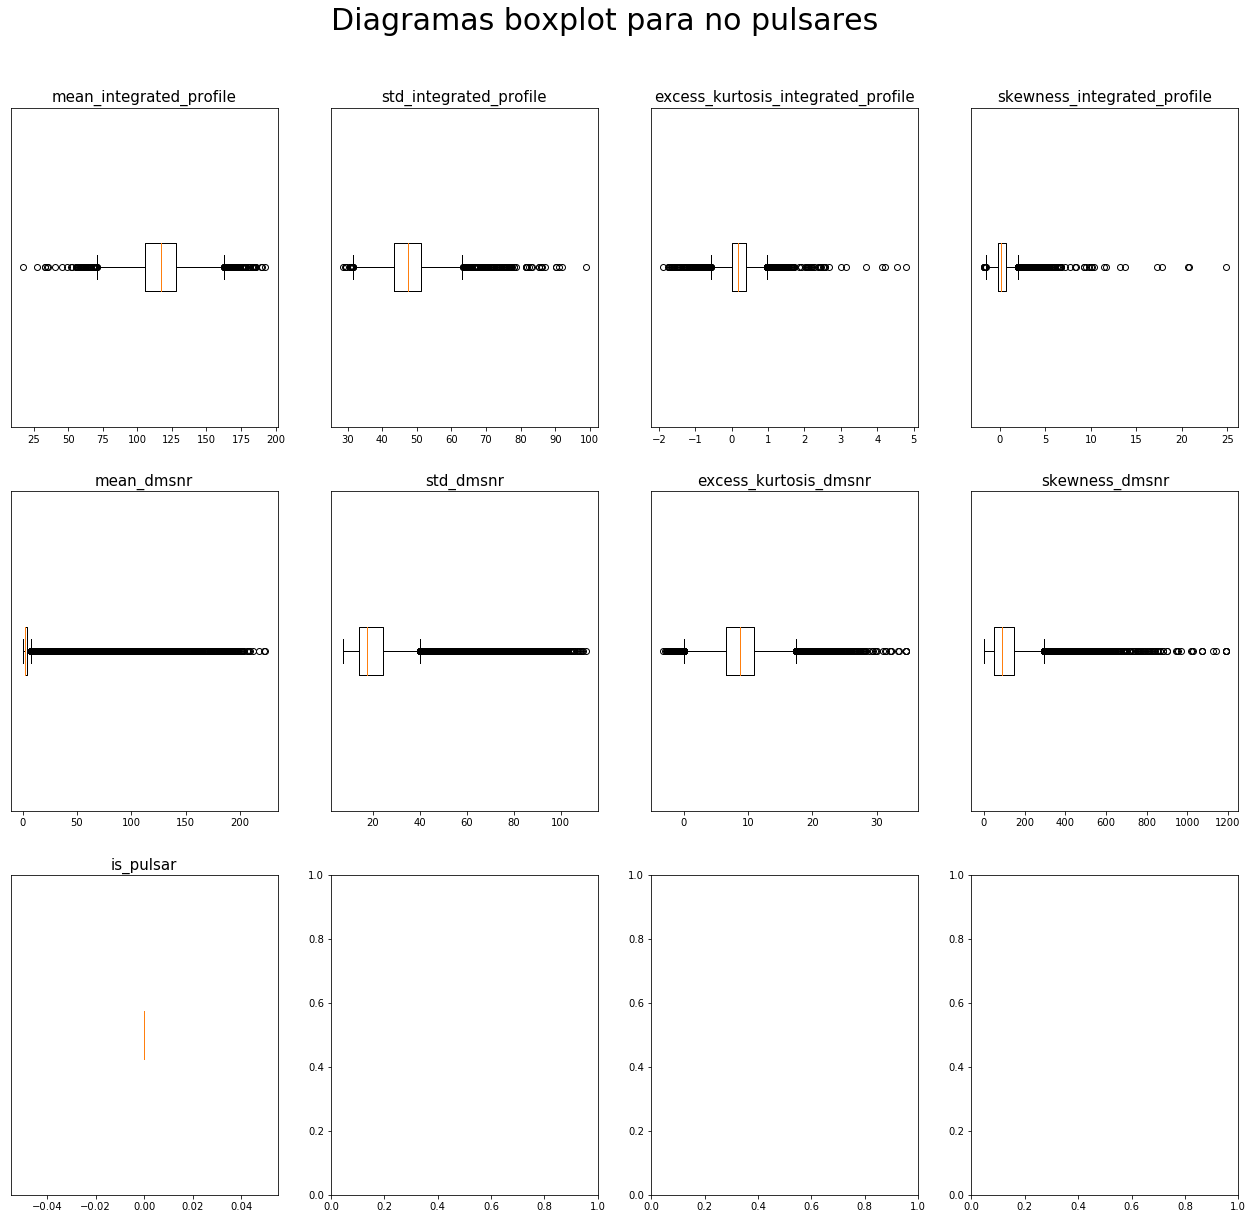

In [33]:
fig, ax = plt.subplots(3, 4, figsize=(22,20))

fig.suptitle('Diagramas boxplot para no pulsares', fontsize=30, y=0.95)

ax = ax.flatten()
for idx, name in enumerate(df.columns):
    ax[idx].boxplot(df[df['is_pulsar']==0][name].values, vert=False)
    ax[idx].set_title(name, fontsize=15)
    ax[idx].set_yticks([])

plt.show()

Podemos ver una gran cantidad de datos atípicos.

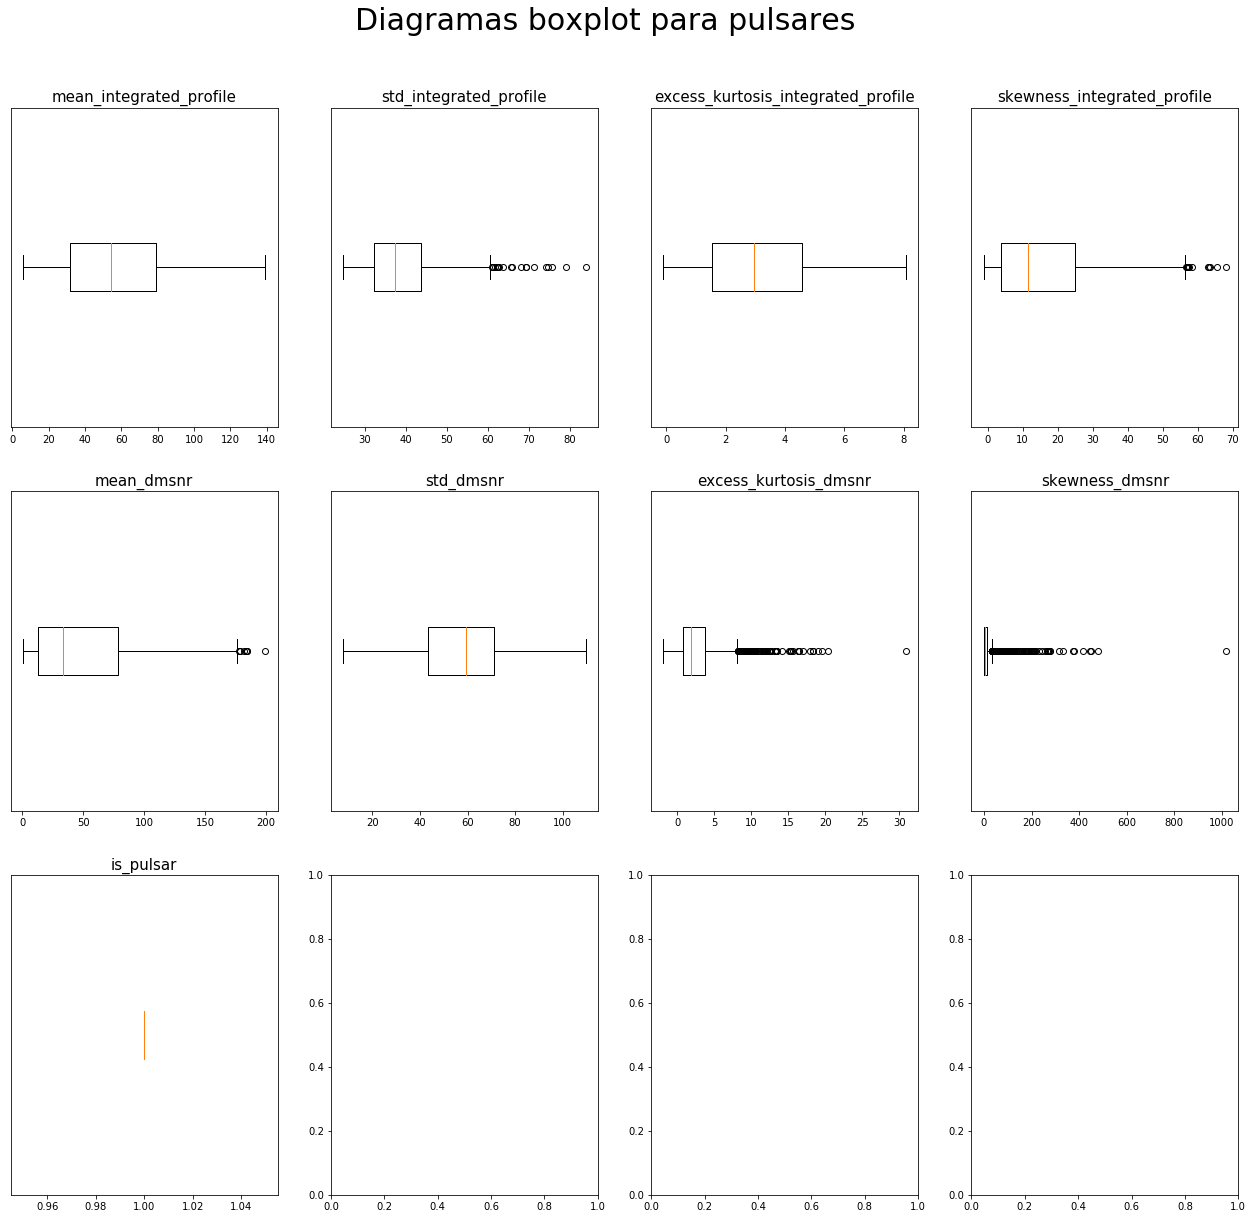

In [31]:
fig, ax = plt.subplots(3, 4, figsize=(22,20))

fig.suptitle('Diagramas boxplot para pulsares', fontsize=30, y=0.95)

ax = ax.flatten()
for idx, name in enumerate(df.columns):
    ax[idx].boxplot(df[df['is_pulsar']==1][name].values, vert=False)
    ax[idx].set_title(name, fontsize=15)
    ax[idx].set_yticks([])
    
plt.show()

### Análisis de la variable target

In [8]:
# Contamos cuantos datos hay para cada clase
df.groupby('is_pulsar').apply(lambda x: x.index.size).rename('count').reset_index().set_index('is_pulsar')

,count
is_pulsar,
0,16259
1,1639


Por lo tanto, la cantidad de datos de pulsares y no pulsares concuerda con la descripcion del dataset. También is_pulsar es booleana como es de esperarse.

<a id='visualizacount'></a>

## Visualización

* Histogramas.
* Scatter matrix coloreando por el _target_.
* Mapa de calor con correlación entre variables.

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

In [9]:
import altair as alt
import matplotlib.pyplot as plt

alt.themes.enable("opaque")

%matplotlib inline

In [10]:
from matplotlib.lines import Line2D

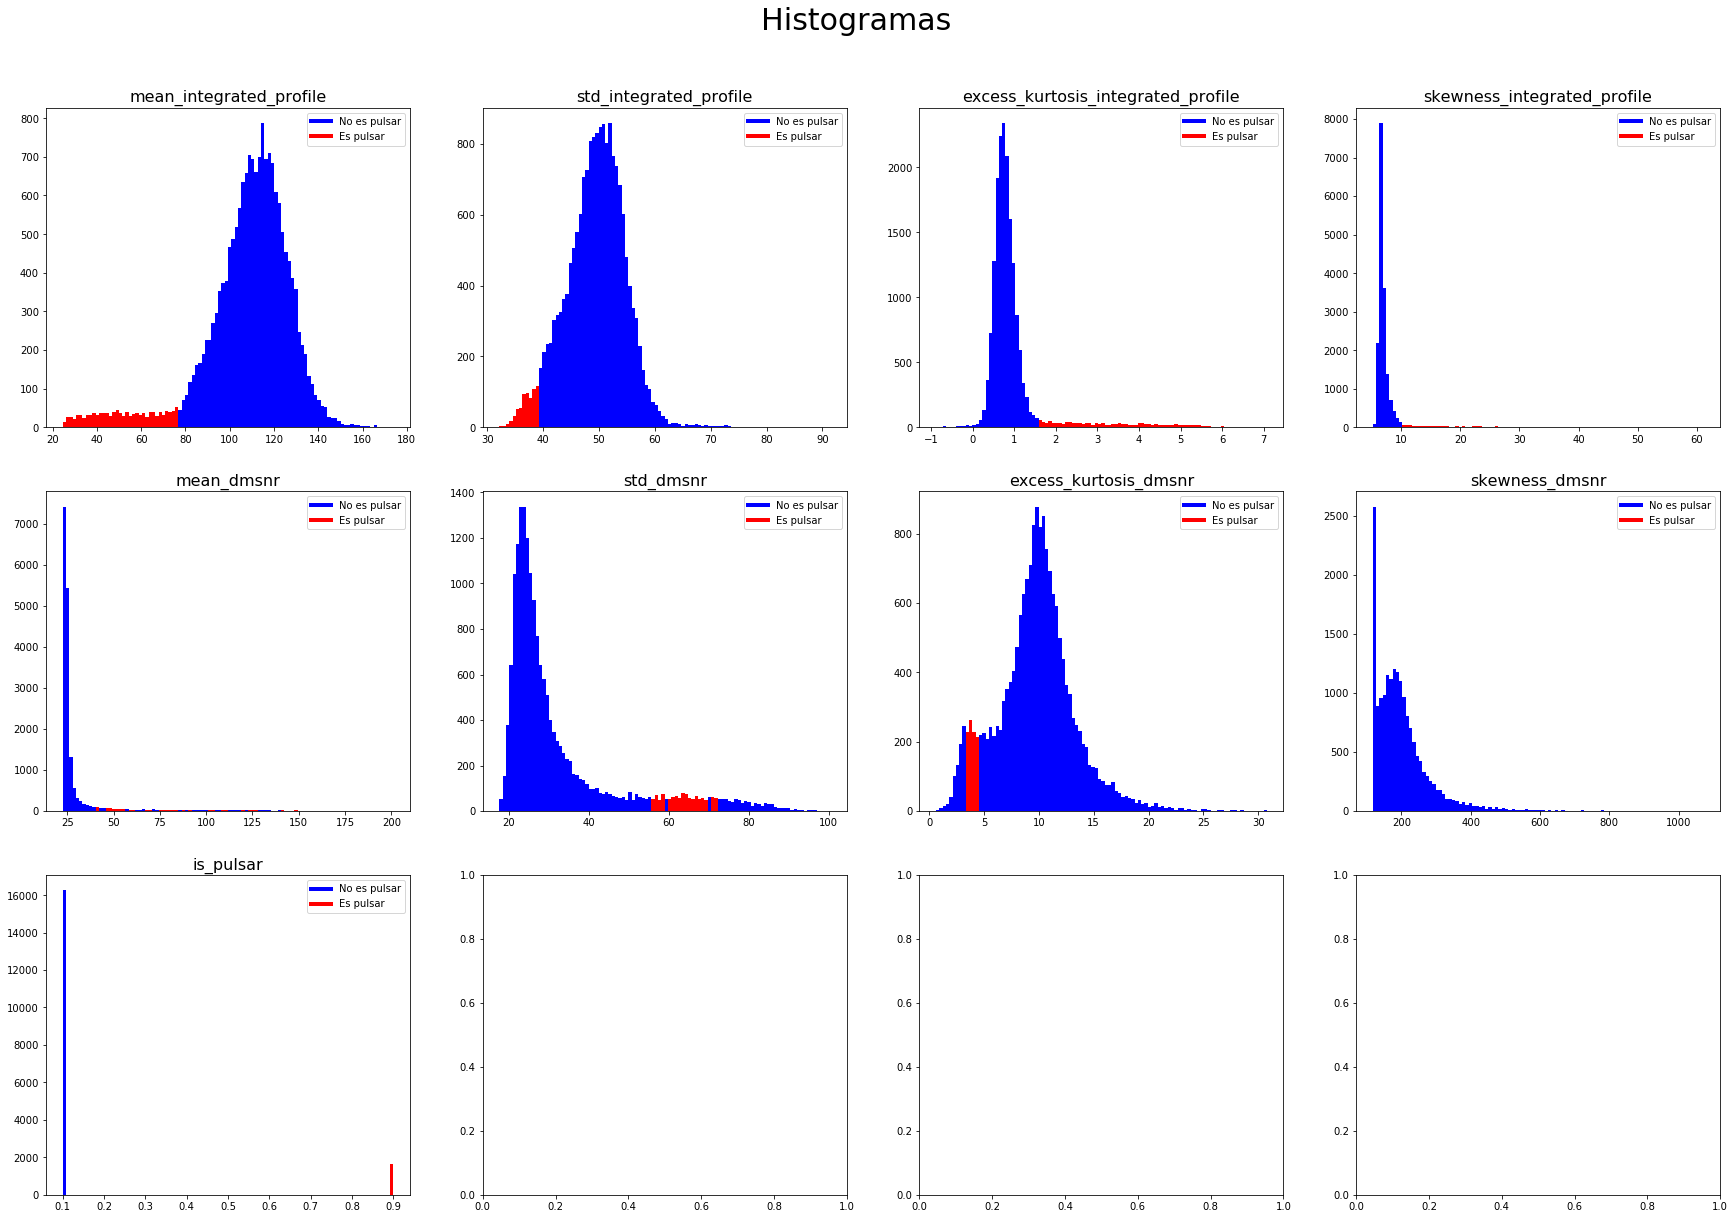

In [11]:
fig, ax = plt.subplots(3, 4, figsize=(30,20))

fig.suptitle('Histogramas', fontsize=30, y=0.95)

colors = list(map(lambda x: {0: 'b', 1: 'r'}[x], df['is_pulsar'].values))

bins_nr = 100

ax = ax.flatten()
for i, name in enumerate(df.columns):
    x = list(zip(*sorted(list(zip(df[name].values, colors)), key=lambda x: x[0])))
        
    digits = np.digitize(x[0], bins=np.linspace(min(x[0]), max(x[0]), bins_nr))

    bins = [[] for _ in range(0, bins_nr)]
    for idx, values in enumerate(x[0]):
        bins[digits[idx] - 1].append(values)
    
    bins_colors = [[] for _ in range(0, bins_nr)]
    for idx, c in enumerate(x[1]):
        bins_colors[digits[idx] - 1].append(c)
    
    color = [max(set(b), key=b.count, default='b') for b in bins_colors]
    
    ax[i].hist(bins, bins=1, color=color)
    ax[i].set_title(name, fontsize=16)
    
    legend_lines = [Line2D([0], [0], color='b', lw=4),
                    Line2D([0], [0], color='r', lw=4)]
    
    ax[i].legend(legend_lines, ['No es pulsar', 'Es pulsar'])
    
plt.show()

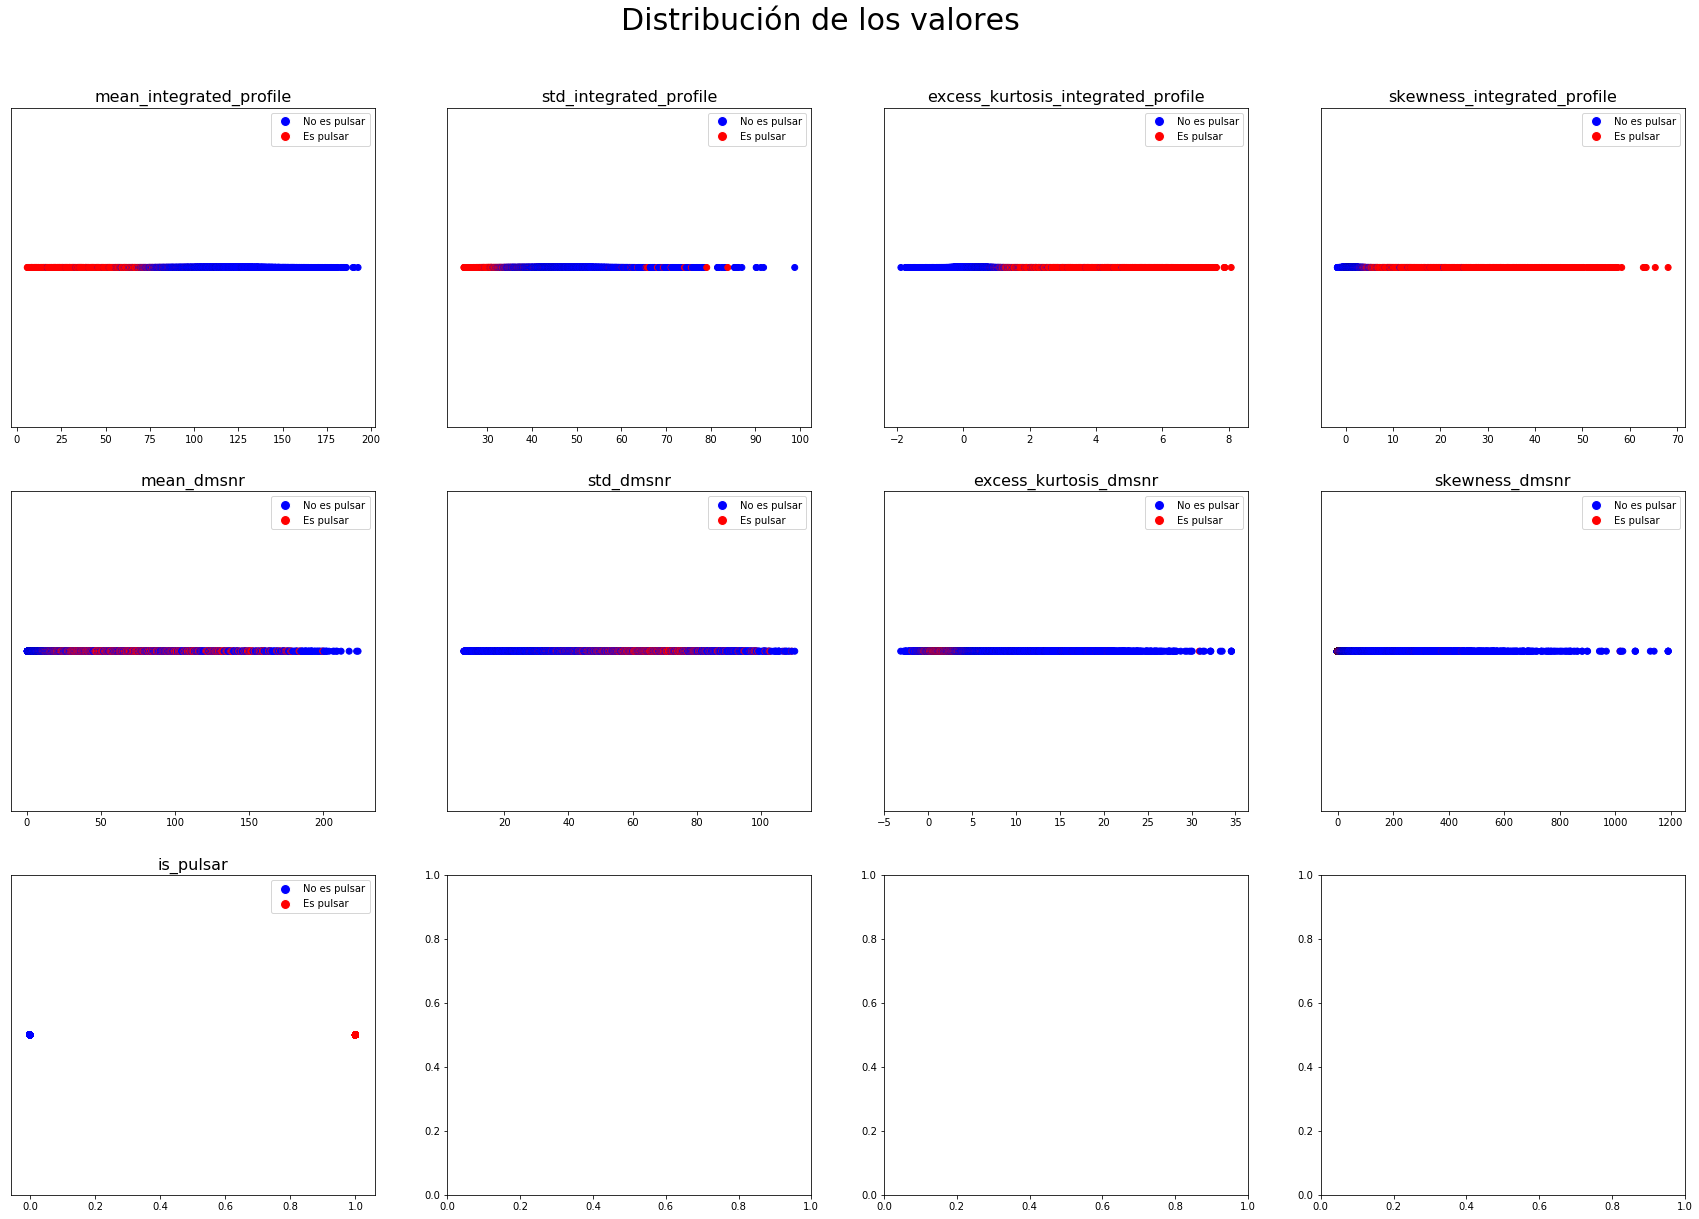

In [12]:
fig, ax = plt.subplots(3, 4, figsize=(30,20))

fig.suptitle('Distribución de los valores', fontsize=30, y=0.95)

colors = list(map(lambda x: {0: 'b', 1: 'r'}[x], df['is_pulsar'].values))

ax = ax.flatten()
for i, name in enumerate(df.columns):
    x = list(zip(*sorted(list(zip(df[name].values, colors)), key=lambda x: x[0])))
    
    ax[i].scatter(x[0], [0] * len(x[0]), c=x[1])
    ax[i].set_title(name, fontsize=16)
    ax[i].set_yticks([])
    
    legend_points = [Line2D([0], [0], color='w', markerfacecolor='b', marker='o', markersize=10),
                     Line2D([0], [0], color='w', markerfacecolor='r', marker='o', markersize=10)]
    
    ax[i].legend(legend_points, ['No es pulsar', 'Es pulsar'])
    
plt.show()

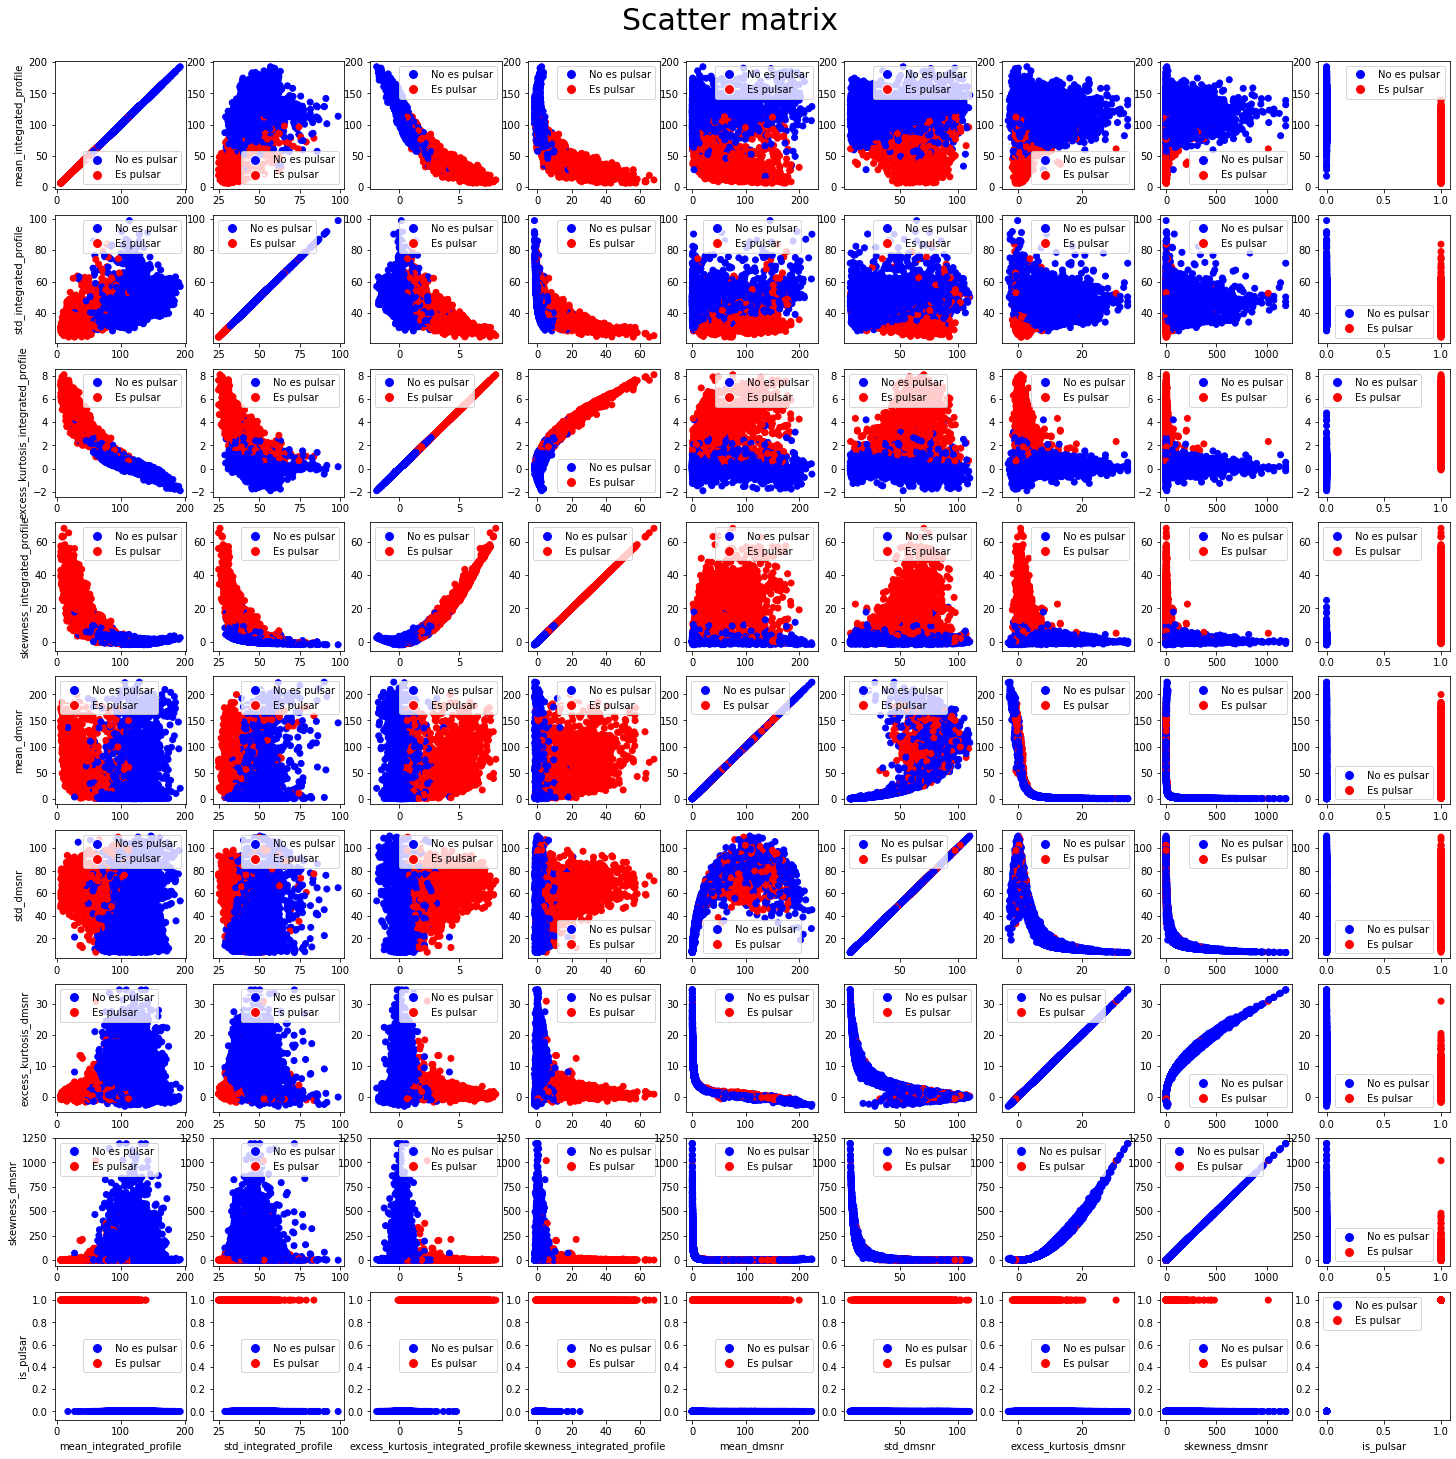

In [35]:
fig, ax = plt.subplots(df.columns.size, df.columns.size, figsize=(25,25))

fig.suptitle('Scatter matrix', fontsize=30, y=0.91)

ax = ax.flatten()

colors = list(map(lambda x: {0: 'b', 1: 'r'}[x], df['is_pulsar'].values))

legend_points = [Line2D([0], [0], color='w', markerfacecolor='b', marker='o', markersize=10),
                 Line2D([0], [0], color='w', markerfacecolor='r', marker='o', markersize=10)]

i = 0 
for name_y in df.columns:
    for name_x in df.columns:              
        ax[i].scatter(df[name_x].values, df[name_y].values, c=colors)
        
        if i % df.columns.size == 0:
            ax[i].set_ylabel(name_y)
        
        if df.columns.size * (df.columns.size - 1) <= i: 
            ax[i].set_xlabel(name_x)        
        
        ax[i].legend(legend_points, ['No es pulsar', 'Es pulsar'],)

        i += 1  
        
plt.show()

In [14]:
from mpl_heatmap import heatmap, annotate_heatmap

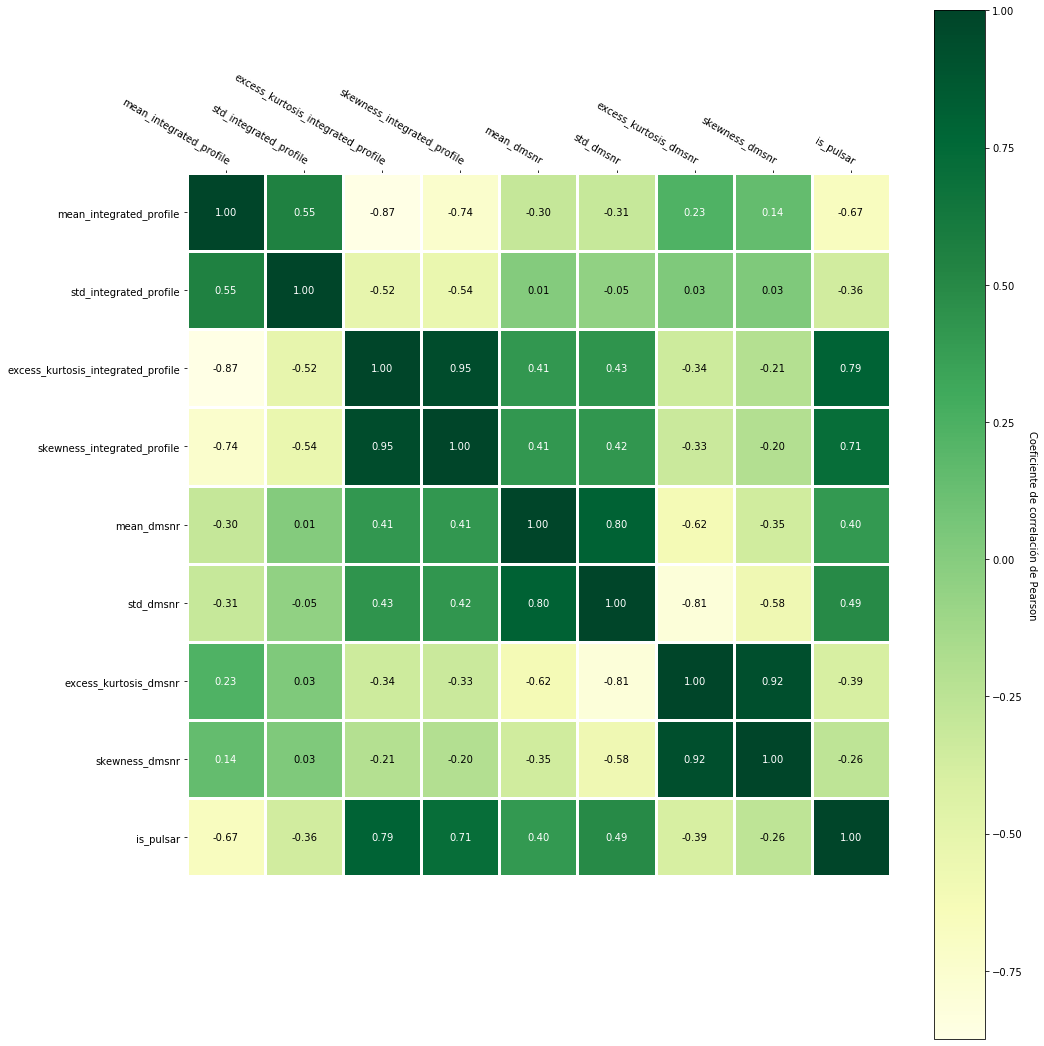

In [36]:
fig, ax = plt.subplots(figsize=(15, 15))

im, cbar = heatmap(df.corr().values, df.columns, df.columns, ax=ax,
                   cmap="YlGn", cbarlabel="Coeficiente de correlación de Pearson")
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

<a id='preprocessing'></a>

## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_raw = df[[column for column in df.columns if column != 'is_pulsar']].values
y = df['is_pulsar'].values

In [ ]:
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

Verificamos que la medida sea nula y que la desviación estándar unitaria. Teniendo en cuenta la precision de la maquina. 

In [ ]:
resolution = np.finfo(type(0.0)).resolution

assert np.abs(X.mean() - 0.0) < resolution and np.abs(X.std() - 1.0) < resolution

Por lo tanto, sí se verifica.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=42, shuffle=True, stratify=y)

<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

In [ ]:
logistic_cv = cross_validate(logistic, X_train, y_train, cv=10, scoring='precision')

In [ ]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.2f} +/- {np.std(logistic_cv["test_score"]):.2f}')

<a id='knn'></a>

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 101)}
knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, scoring='precision')

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
knn_cv = cross_validate(knn.best_estimator_, X_train, y_train, cv=10, scoring='precision')

In [ ]:
print(f'KNN Cross Validation precision score: {np.mean(knn_cv["test_score"]):.2f} +/- {np.std(knn_cv["test_score"]):.2f} with train data.')

<a id='free-style'></a>

## Modelo a elección

* Escoge un modelo de clasificación de [aquí](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) que por lo menos tenga un hiperparámetro, por ejemplo, [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) tiene el parámetro de regularización `C`.
* Explica en uno o dos párrafos en qué consiste el algoritmo/modelo.
* Al igual que KNN, encuentra el/los mejores valores para los hiperparámetros.
* Con el mejor estimador realiza _Cross Validation_ con los datos de entrenamiento.
* Calcula el intervalo de confianza de _precision_.

Los modelos Support Vector Machine (SVM) transforman los datos de entrada basados en un kernel. En el espacio de datos resultante, se hace una division por un hiperplano. Se clasifica de una clase a los que estan en un lado del hiperplano y por otra clase a los que estan en el otro lado del hiperplano. En `SVC`, el parametro `C` determina el margen que se añade al hiperplano. Un gran valor de `C` significa un menor margen. El margen hace que cada clase vea el hiperplano más cerca. Esto hace que el modelo permita tener más puntos en el lado incorrecto. Con un gran parametro `C` causamos sobreajuste porque permitimos menos puntos ser mal clasificados. 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': np.arange(0.1, 5, 0.1)}
my_model = GridSearchCV(SVC(), param_grid=param_grid, cv=10, scoring='precision')

In [ ]:
my_model.fit(X_train, y_train)

In [ ]:
my_model_cv = cross_validate(my_model.best_estimator_, X_train, y_train, cv=10, scoring='precision')

In [ ]:
print(f'MY MODEL Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.2f} +/- {np.std(my_model_cv["test_score"]):.2f} with train data.')

<a id='model-selection'></a>

## Selección de Modelo

* Compara la _precision_ entre cada uno de los modelos.
* Grafica la matriz de confusión para cada uno de los modelos.
* Calcula un intervalo de confianza del tiempo utilizado en el ajuste de cada modelo. Ver documentación de `cross_validate`.
* Gráficos o reportes adicionales.

In [ ]:
from sklearn.metrics import precision_score, classification_report

In [ ]:
print(f'Logistic Regression test precision score: {precision_score(y_test, logistic.predict(X_test))}')

In [ ]:
print(f'KNN test precision score: {precision_score(y_test, knn.best_estimator_.predict(X_test))}')

In [ ]:
print(f'MY MODEL test precision score: {precision_score(y_test, my_model.best_estimator_.predict(X_test))}')

<a id='conclusions'></a>

### Matrices de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def alt_confusion_matrix(estimator, X, y_true, estimator_name):
    labels_names = {0: 'No es pulsar', 1: 'Es pulsar'}
    
    confusion_matrix_for_test = confusion_matrix(y_true, estimator.predict(X), labels=[0,1])
    
    confusion_df = pd.DataFrame([[labels_names[x], labels_names[y], confusion_matrix_for_test[y, x]] for y in [0, 1] for x in [0,1]], columns=['x','y','value'])

    boxes = alt.Chart(confusion_df).mark_rect().encode(
        x=alt.X('x:O', title='Predicción', sort=[labels_names[0], labels_names[1]], axis=alt.Axis(labelAngle=0, orient='top')),
        y=alt.Y('y:O', title='Real', sort=[labels_names[0], labels_names[1]]),
        color=alt.Color('value:Q', scale=alt.Scale(nice=True))
    ).properties(
        width=400,
        height=400,
        title=alt.TitleParams(f'Matriz de confusión para {estimator_name}', offset=20)
    )

    texts = alt.Chart(confusion_df).mark_text().encode(
        x=alt.X('x:N', sort=[labels_names[0], labels_names[1]]),
        y=alt.Y('y:N', sort=[labels_names[0], labels_names[1]]),
        color=alt.condition(
            alt.datum['value'] > confusion_df['value'].mean(),
            alt.ColorValue('white'),
            alt.ColorValue('black')
        ),
        text=alt.Text('value')
    ).properties(
        width=300,
        height=300,
    )

    return boxes + texts

In [ ]:
models = [
    {'name': 'regresion logística', 'estimator': logistic},
    {'name': 'k vecinos más cercanos', 'estimator': knn.best_estimator_},
    {'name': 'C-Support Vector Classification', 'estimator': my_model.best_estimator_},
]

charts = [alt_confusion_matrix(model['estimator'], X_test, y_test, estimator_name=f"el modelo de {model['name']}") for model in models]

(charts[0] | charts[1]) & charts[2]

### Intervalos de confianza

In [ ]:
print(f'Logistic Regression: Regresion logística - Intervalo de confianza del tiempo utilizado en el ajuste: {np.mean(logistic_cv["fit_time"]):.2f} +/- {np.std(logistic_cv["fit_time"]):.2f}.')

In [ ]:
print(f'KNN: k vecinos más cercanos - Intervalo de confianza del tiempo utilizado en el ajuste: {np.mean(knn_cv["fit_time"]):.2f} +/- {np.std(knn_cv["fit_time"]):.2f}.')

In [ ]:
print(f'MY MODEL: C-Support Vector Classification - Intervalo de confianza del tiempo utilizado en el ajuste: {np.mean(my_model_cv["fit_time"]):.2f} +/- {np.std(my_model_cv["fit_time"]):.2f}.')

### Reportes adicionales

In [ ]:
for model in models:
    print(f"{model['name'].capitalize()}:")
    print(classification_report(y_test, logistic.predict(X_test)))

## Conclusiones

Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultados, etc.

##  preguntas iniciales

### ¿Cuál modelo tiene mejor precision?

 El modelo que tiene mejor `precision` es el KNN con un score de `0.9655493482309124`.

### ¿Cuál modelo demora menos tiempo en ajustarse?

El modelo que demora menos en tiempo de ajuste es KNN pues su intervalo de confianza es `0.00 +/- 0.00`. Notar que no es cero porque esta truncado.

### ¿Qué modelo escoges?

Escojo KNN pues es el que demoró menos en ajustarse y obtuvo una mayor precision en los datos de prueba.

### ¿Por qué utilizar precision y no otro score?

Porque la idea es automatizar el proceso de detección de pulsares de manera que funcione como un filto para que, luego, sea revisado manualemente. Por esto, hay que minimizar la cantidad de falsos positivos. Porque, si se revisa manualmente un falso positivo, es un gasto de tiempo. El score de `precision` es el que minimiza el porcentaje de falsos positivos en los datos mal clasificados. Es por esto que se elige.

## Visualizaciones

Los histogramas dan soporte a que los datos son obtenidos a partir de observaciones de un mismo evento porque parecen distribuir normal (teorema del límite central).

Cuando observamos el grafico `distribución de los datos`. Podemos ver en los subgraficos `mean_integrated_profile`, `excess_kurtosis_integrated_profile`, `skewness_integrated_profile` que las clases estan separadas a partir de un valor. De la misma manera, en algunos graficos del `scatter matrix`, se puede ver que es fácil separar las clases por una recta.